In [ ]:
# Força downgrade do NumPy ANTES de instalar qualquer outra lib
!pip install "numpy<2.0" --force-reinstall --no-cache-dir

In [ ]:
# Força downgrade do NumPy ANTES de instalar qualquer outra lib
!pip install "scipy==1.10.1" --force-reinstall --no-cache-dir

In [1]:
import numpy
import scipy
print("NumPy version:", numpy.__version__)
print("SciPy version:", scipy.__version__)

NumPy version: 1.26.4
SciPy version: 1.10.1


In [2]:
!pip install -Uq fastbook

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 10.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.1/124.1 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.9/246.9 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 85.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 68.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 28.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1

In [4]:
import fastbook
fastbook.setup_book()

In [6]:
#hide
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

# Convolutional Neural Networks

## The Magic of Convolutions

In [7]:
top_edge = tensor([[-1,-1,-1],
                   [ 0, 0, 0],
                   [ 1, 1, 1]]).float()

In [8]:
path = untar_data(URLs.MNIST_SAMPLE)

In [9]:
#hide
Path.BASE_PATH = path

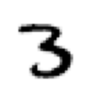

In [10]:
im3 = Image.open(path/'train'/'3'/'12.png')
show_image(im3);

In [11]:
im3_t = tensor(im3)
im3_t[0:3,0:3] * top_edge

tensor([[-0., -0., -0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [12]:
(im3_t[0:3,0:3] * top_edge).sum()

tensor(0.)

In [13]:
df = pd.DataFrame(im3_t[:10,:20])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,12,99,91,142,155,246,182,155,155,155,155,131,52,0,0,0,0
6,0,0,0,138,254,254,254,254,254,254,254,254,254,254,254,252,210,122,33,0
7,0,0,0,220,254,254,254,235,189,189,189,189,150,189,205,254,254,254,75,0
8,0,0,0,35,74,35,35,25,0,0,0,0,0,0,13,224,254,254,153,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,90,254,254,247,53,0


In [14]:
(im3_t[4:7,6:9] * top_edge).sum()

tensor(762.)

In [15]:
(im3_t[7:10,17:20] * top_edge).sum()

tensor(-29.)

In [16]:
def apply_kernel(row, col, kernel):
    return (im3_t[row-1:row+2,col-1:col+2] * kernel).sum()

In [17]:
apply_kernel(5,7,top_edge)

tensor(762.)

### Mapping a Convolution Kernel

In [18]:
[[(i,j) for j in range(1,5)] for i in range(1,5)]

[[(1, 1), (1, 2), (1, 3), (1, 4)],
 [(2, 1), (2, 2), (2, 3), (2, 4)],
 [(3, 1), (3, 2), (3, 3), (3, 4)],
 [(4, 1), (4, 2), (4, 3), (4, 4)]]

In [19]:
rng = range(1,27)
rng

range(1, 27)

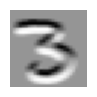

In [25]:
rng = range(1,27)

top_edge3 = tensor([[apply_kernel(i,j,top_edge) for j in rng] for i in rng])

show_image(top_edge3);

In [24]:
top_edge3.shape

torch.Size([26, 26])

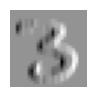

In [26]:
left_edge = tensor([[-1,1,0],
                    [-1,1,0],
                    [-1,1,0]]).float()

left_edge3 = tensor([[apply_kernel(i,j,left_edge) for j in rng] for i in rng])

show_image(left_edge3);

### Convolutions in PyTorch

In [27]:
diag1_edge = tensor([[ 0,-1, 1],   # Cada kernel (como top_edge, diag1_edge, etc.) é uma matriz 2D (3×3)
                     [-1, 1, 0],
                     [ 1, 0, 0]]).float()
diag2_edge = tensor([[ 1,-1, 0],
                     [ 0, 1,-1],
                     [ 0, 0, 1]]).float()

edge_kernels = torch.stack([left_edge, top_edge, diag1_edge, diag2_edge]) # torch.stack([...]) junta todos eles ao longo de um novo eixo (o eixo 0)

edge_kernels.shape # O resultado é um tensor 3D, com shape (n_filtros (ou kernels), altura dos filtros, largura dos filtros)

torch.Size([4, 3, 3])

In [28]:
mnist = DataBlock((ImageBlock(cls=PILImageBW), CategoryBlock), 
                  get_items=get_image_files, 
                  splitter=GrandparentSplitter(),
                  get_y=parent_label)

dls = mnist.dataloaders(path)     # Cria os DataLoaders
xb, yb = first(dls.valid)         # Pega o primeiro batch da validação
xb.shape                          # Pergunta: qual o shape da imagem de entrada? (numero de imagens, canais, altura, largura)

torch.Size([64, 1, 28, 28])

In [29]:
xb,yb = to_cpu(xb),to_cpu(yb)

In [30]:
edge_kernels.shape,edge_kernels.unsqueeze(1).shape

# 4 filtros, Cada filtro espera 1 canal de entrada, Kernel 3×3

(torch.Size([4, 3, 3]), torch.Size([4, 1, 3, 3]))

In [31]:
edge_kernels = edge_kernels.unsqueeze(1)

In [32]:
batch_features = F.conv2d(xb, edge_kernels)
batch_features.shape

# As batch_features são os mapas de ativações (feature maps) resultantes da aplicação dos seus filtros de detecção de bordas em cada imagem do batch.
# shape: número de imagens por batch, número de filtros aplicados, altura e largura. 
# Para cada imagem teremos 4 mapas de ativação de 26x26. 

torch.Size([64, 4, 26, 26])

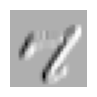

In [33]:
show_image(batch_features[0,0]);

### Strides and Padding

### Understanding the Convolution Equations

## Our First Convolutional Neural Network

### Creating the CNN

In [34]:
simple_net = nn.Sequential(
    nn.Linear(28*28,30),
    nn.ReLU(),
    nn.Linear(30,1)
)

In [35]:
simple_net

Sequential(
  (0): Linear(in_features=784, out_features=30, bias=True)
  (1): ReLU()
  (2): Linear(in_features=30, out_features=1, bias=True)
)

In [36]:
broken_cnn = sequential(
    nn.Conv2d(1,30, kernel_size=3, padding=1), #Conv2d (canais de entrada, canais de saída, tamanho do kernel, padding)
    nn.ReLU(),
    nn.Conv2d(30,1, kernel_size=3, padding=1)
) 

In [38]:
broken_cnn

Sequential(
  (0): Conv2d(1, 30, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): Conv2d(30, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
)

In [37]:
broken_cnn(xb).shape # (tamanho do batche, numero de canais de saída, altura do mapa de ativação, largura do mapa de ativação)

torch.Size([64, 1, 28, 28])

In [39]:
def conv(ni, nf, ks=3, act=True):
    res = nn.Conv2d(ni, nf, stride=2, kernel_size=ks, padding=ks//2) #ni: canais de entrada, nf: canais de saída, ks: tamanho do kernal
    if act: res = nn.Sequential(res, nn.ReLU()) # Se act = True: nn.Sequential (nn.Conv2d, nnReLU ())
    return res

In [41]:
conv(1 ,4) # Exemplo do codigo anterior

Sequential(
  (0): Conv2d(1, 4, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (1): ReLU()
)

In [44]:
simple_cnn = sequential( # o sequential é uma versao melhorada do FastAI do nn.Sequential
    conv(1 ,4),            #14x14
    conv(4 ,8),            #7x7
    conv(8 ,16),           #4x4
    conv(16,32),           #2x2
    conv(32,2, act=False), #1x1
    Flatten(),
)

In [45]:
simple_cnn(xb).shape (# Numero de batches, canais de saída - o flatten tirou o 1x1)

torch.Size([64, 2])

In [46]:
learn = Learner(dls, simple_cnn, loss_func=F.cross_entropy, metrics=accuracy)

In [47]:
learn.summary()

# Input shape: (tamanho do batch, canais de entrada, altura da matriz de entrada, largura da matriz de entrada)
# Output shape: (tamanho do batch, canais de saída, altura de mapa de ativações, largura de mapa de ativações)
# Número de parametros: Canais de entrada (canais de saída da camada anterior para camadas intermediárias), canais de saída, altura do kernel, largura do kernel)

Sequential (Input shape: 64 x 1 x 28 x 28)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 4 x 14 x 14    
Conv2d                                    40         True      
ReLU                                                           
____________________________________________________________________________
                     64 x 8 x 7 x 7      
Conv2d                                    296        True      
ReLU                                                           
____________________________________________________________________________
                     64 x 16 x 4 x 4     
Conv2d                                    1168       True      
ReLU                                                           
____________________________________________________________________________
                     64 x 32 x 2 x 2     
Conv2d                                    4640       True      
ReLU                                          

In [48]:
learn.fit_one_cycle(2, 0.01)

epoch,train_loss,valid_loss,accuracy,time
0,0.064510,0.039210,0.986261,00:05
1,0.025585,0.028048,0.990186,00:04


### Understanding Convolution Arithmetic

In [49]:
m = learn.model[0] # Primeira camada conv + ReLU
m

Sequential(
  (0): Conv2d(1, 4, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (1): ReLU()
)

In [50]:
m[0].weight.shape # Pesos da primeira camada conv. Shape: (canais da saída, canais de entrada, altura do kernel, largura do kernel)

torch.Size([4, 1, 3, 3])

In [51]:
m[0].bias.shape

torch.Size([4])

### Receptive Fields

### A Note About Twitter

## Color Images

In [52]:
im = image2tensor(Image.open(image_bear()))
im.shape # (numero de canais, altura e largura)

torch.Size([3, 1000, 846])

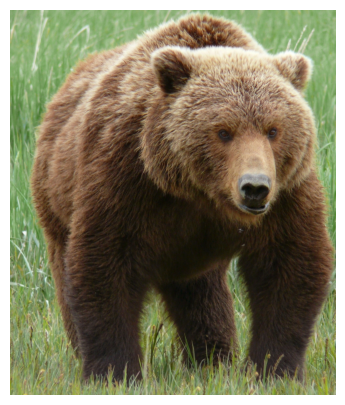

In [53]:
show_image(im);

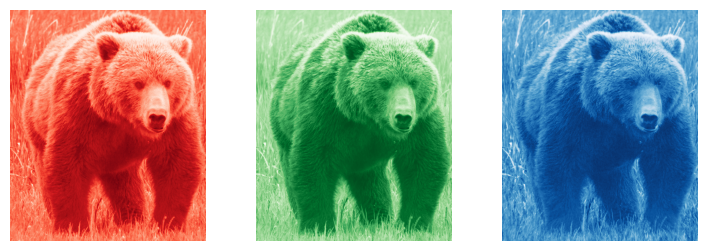

In [54]:
_,axs = subplots(1,3)
for bear,ax,color in zip(im,axs,('Reds','Greens','Blues')):
    show_image(255-bear, ax=ax, cmap=color)

## Improving Training Stability

In [55]:
path = untar_data(URLs.MNIST)

In [56]:
#hide
Path.BASE_PATH = path

In [57]:
path.ls()

(#2) [Path('testing'),Path('training')]

In [58]:
def get_dls(bs=64):
    return DataBlock(
        blocks=(ImageBlock(cls=PILImageBW), CategoryBlock), 
        get_items=get_image_files, 
        splitter=GrandparentSplitter('training','testing'),
        get_y=parent_label,
        batch_tfms=Normalize()
    ).dataloaders(path, bs=bs)

dls = get_dls()

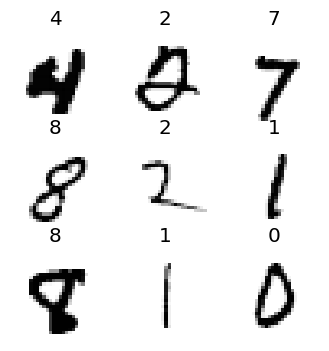

In [59]:
dls.show_batch(max_n=9, figsize=(4,4))

### A Simple Baseline

In [60]:
def conv(ni, nf, ks=3, act=True):
    res = nn.Conv2d(ni, nf, stride=2, kernel_size=ks, padding=ks//2)
    if act: res = nn.Sequential(res, nn.ReLU())
    return res

In [61]:
def simple_cnn():
    return sequential(
        conv(1 ,8, ks=5),        #14x14
        conv(8 ,16),             #7x7
        conv(16,32),             #4x4
        conv(32,64),             #2x2
        conv(64,10, act=False),  #1x1
        Flatten(),
    )

In [62]:
from fastai.callback.hook import *

In [63]:
def fit(epochs=1):
    learn = Learner(dls, simple_cnn(), loss_func=F.cross_entropy,
                    metrics=accuracy, cbs=ActivationStats(with_hist=True))
    learn.fit(epochs, 0.06)
    return learn

In [64]:
learn = fit()

/usr/local/lib/python3.11/dist-packages/fastai/callback/core.py:71: UserWarning: You are shadowing an attribute (modules) that exists in the learner. Use `self.learn.modules` to avoid this
  warn(f"You are shadowing an attribute ({name}) that exists in the learner. Use `self.learn.{name}` to avoid this")


epoch,train_loss,valid_loss,accuracy,time
0,2.305181,2.307163,0.113500,00:27


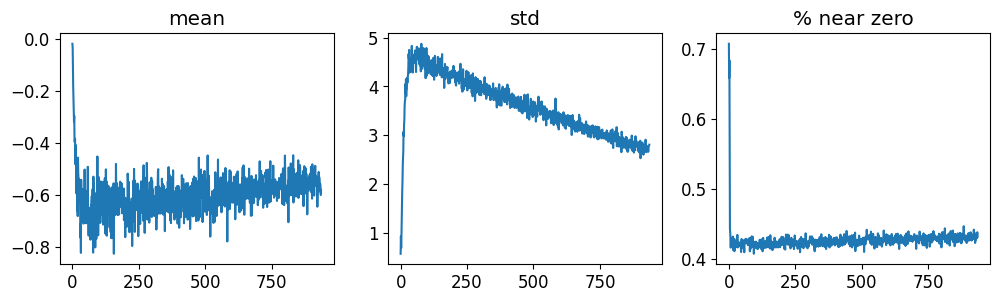

In [65]:
learn.activation_stats.plot_layer_stats(0) # Gráficos com média, desvio padrão e % quase zero nas ativações de cada camada. Eixo y: valores; Eixo x: número de batches. (0) indica que é da primeira caamada

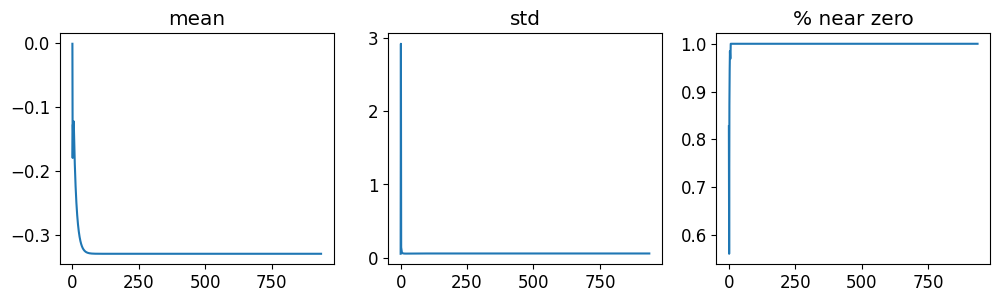

In [66]:
learn.activation_stats.plot_layer_stats(-2)

### Increase Batch Size

In [67]:
dls = get_dls(512) # Aumentando batche size a partir de função definida anteriormente

In [68]:
learn = fit()

epoch,train_loss,valid_loss,accuracy,time
0,2.305237,2.302844,0.101000,00:21


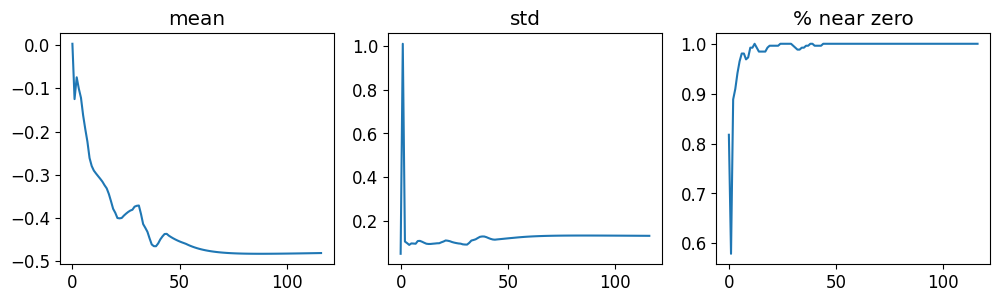

In [69]:
learn.activation_stats.plot_layer_stats(-2)

### 1cycle Training

In [70]:
def fit(epochs=1, lr=0.06):
    learn = Learner(dls, simple_cnn(), loss_func=F.cross_entropy,
                    metrics=accuracy, cbs=ActivationStats(with_hist=True))
    learn.fit_one_cycle(epochs, lr) # Fazendo fit one cycle
    return learn 

In [71]:
learn = fit()

epoch,train_loss,valid_loss,accuracy,time
0,0.221080,0.080291,0.973100,00:21


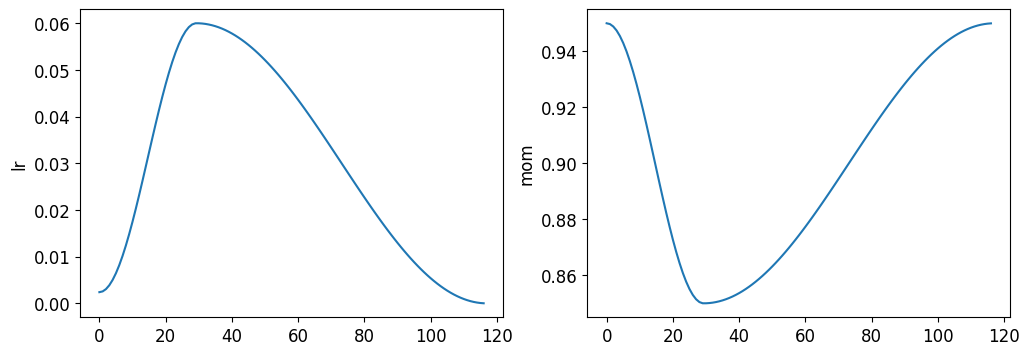

In [72]:
learn.recorder.plot_sched() #Gráfico mostrando como learning rate e momentum variaram ao longo dos batches

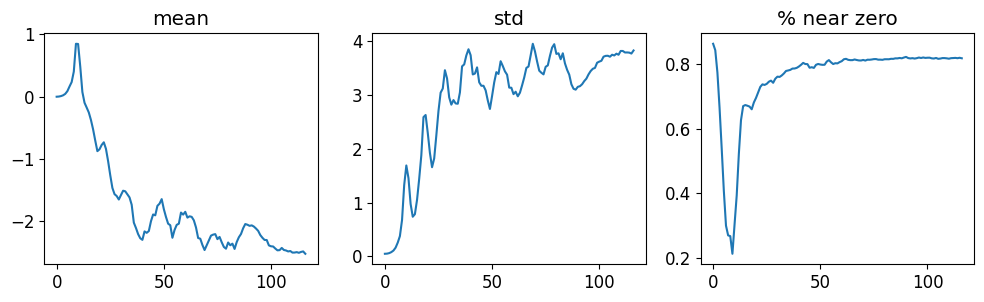

In [73]:
learn.activation_stats.plot_layer_stats(-2)

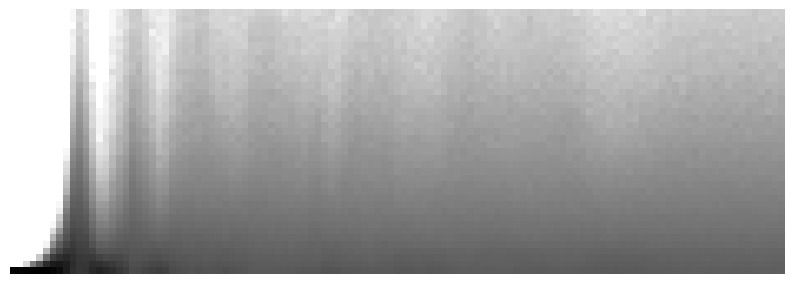

In [74]:
learn.activation_stats.color_dim(-2) 

# Utilizando o color dim para avaliar 

# color_dim é uma visualização onde cada linha vertical representa a distribuição das ativações de uma camada para um único batch, mostrada como um histograma codificado por cores.
# Ativações boas (saudáveis) em redes neurais geralmente seguem uma distribuição suave, como a normal (gaussiana).
# Verificar isso manualmente para cada batch e camada é difícil.
# A solução: transformar cada histograma em uma imagem colorida, onde:
# Eixo X: representa o progresso no tempo (batch por batch)
# Eixo Y: representa os valores das ativaçÕes
# Cor (intensidade): representa a frequência de ativações naquele bin

# Trecho do livro sobre intepretação da imagem abaixo
# "This shows a classic picture of "bad training." We start with nearly all activations at zero—that's what we see at the far left, with all the dark blue. The bright yellow at the bottom represents the near-zero activations. Then, over the first few batches we see the number of nonzero activations exponentially increasing. But it goes too far, and collapses! We see the dark blue return, and the bottom becomes bright yellow again. It almost looks like training restarts from scratch. Then we see the activations increase again, and collapse again. After repeating this a few times, eventually we see a spread of activations throughout the range.
# It's much better if training can be smooth from the start. The cycles of exponential increase and then collapse tend to result in a lot of near-zero activations, resulting in slow training and poor final results. One way to solve this problem is to use batch normalization."

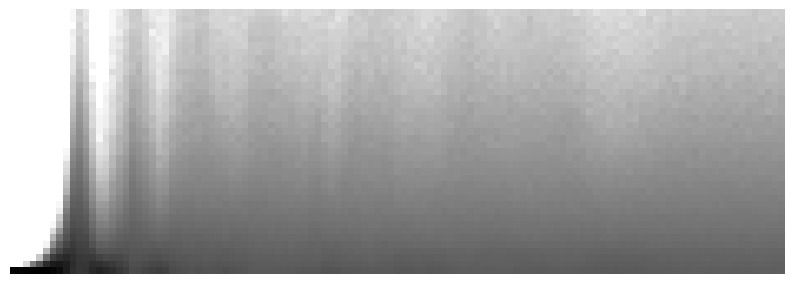

In [75]:
learn.activation_stats.color_dim(-2)

### Batch Normalization

In [76]:
def conv(ni, nf, ks=3, act=True):
    layers = [nn.Conv2d(ni, nf, stride=2, kernel_size=ks, padding=ks//2)]
    if act: layers.append(nn.ReLU())
    layers.append(nn.BatchNorm2d(nf)) # Aplicando batch normalization. 
    return nn.Sequential(*layers)

In [77]:
learn = fit()

epoch,train_loss,valid_loss,accuracy,time
0,0.133974,0.059528,0.984900,00:24


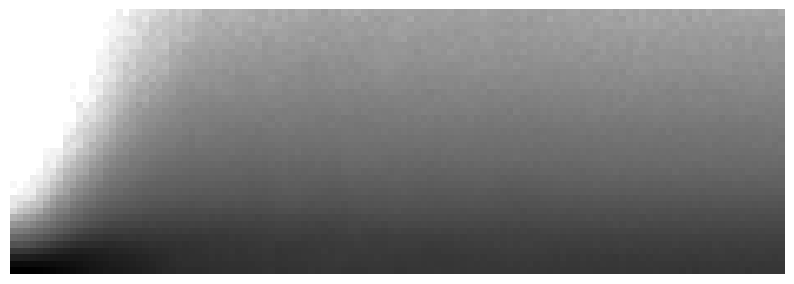

In [78]:
learn.activation_stats.color_dim(-4)

In [79]:
learn = fit(5, lr=0.1)

epoch,train_loss,valid_loss,accuracy,time
0,0.178205,0.073566,0.978000,00:24
1,0.077788,0.054968,0.984000,00:24
2,0.051316,0.039871,0.987600,00:24
3,0.032469,0.034740,0.990000,00:24
4,0.017171,0.026121,0.991500,00:24


## Conclusions

## Questionnaire

1. What is a "feature"?
1. Write out the convolutional kernel matrix for a top edge detector.
1. Write out the mathematical operation applied by a 3×3 kernel to a single pixel in an image.
1. What is the value of a convolutional kernel apply to a 3×3 matrix of zeros?
1. What is "padding"?
1. What is "stride"?
1. Create a nested list comprehension to complete any task that you choose.
1. What are the shapes of the `input` and `weight` parameters to PyTorch's 2D convolution?
1. What is a "channel"?
1. What is the relationship between a convolution and a matrix multiplication?
1. What is a "convolutional neural network"?
1. What is the benefit of refactoring parts of your neural network definition?
1. What is `Flatten`? Where does it need to be included in the MNIST CNN? Why?
1. What does "NCHW" mean?
1. Why does the third layer of the MNIST CNN have `7*7*(1168-16)` multiplications?
1. What is a "receptive field"?
1. What is the size of the receptive field of an activation after two stride 2 convolutions? Why?
1. Run *conv-example.xlsx* yourself and experiment with *trace precedents*.
1. Have a look at Jeremy or Sylvain's list of recent Twitter "like"s, and see if you find any interesting resources or ideas there.
1. How is a color image represented as a tensor?
1. How does a convolution work with a color input?
1. What method can we use to see that data in `DataLoaders`?
1. Why do we double the number of filters after each stride-2 conv?
1. Why do we use a larger kernel in the first conv with MNIST (with `simple_cnn`)?
1. What information does `ActivationStats` save for each layer?
1. How can we access a learner's callback after training?
1. What are the three statistics plotted by `plot_layer_stats`? What does the x-axis represent?
1. Why are activations near zero problematic?
1. What are the upsides and downsides of training with a larger batch size?
1. Why should we avoid using a high learning rate at the start of training?
1. What is 1cycle training?
1. What are the benefits of training with a high learning rate?
1. Why do we want to use a low learning rate at the end of training?
1. What is "cyclical momentum"?
1. What callback tracks hyperparameter values during training (along with other information)?
1. What does one column of pixels in the `color_dim` plot represent?
1. What does "bad training" look like in `color_dim`? Why?
1. What trainable parameters does a batch normalization layer contain?
1. What statistics are used to normalize in batch normalization during training? How about during validation?
1. Why do models with batch normalization layers generalize better?

### Further Research

1. What features other than edge detectors have been used in computer vision (especially before deep learning became popular)?
1. There are other normalization layers available in PyTorch. Try them out and see what works best. Learn about why other normalization layers have been developed, and how they differ from batch normalization.
1. Try moving the activation function after the batch normalization layer in `conv`. Does it make a difference? See what you can find out about what order is recommended, and why.